# Sensitivity Analysis
In this notebook, we test the sensitivity of CLaP (regarding sampling rate and noise).

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys

sys.path.append("../../")

Let's load scores for different sampling rates and noise levels. 

In [3]:
resample_rates = np.arange(.1, 1.9 + 0.1, 0.1)
df_covering_resampled = pd.DataFrame()
df_ami_resampled = pd.DataFrame()

for rate in resample_rates:
    candidate_name = f"{round(rate, 1)}_resampled"
    df = pd.read_csv(f"../../experiments/sensitivity/train_{candidate_name}.csv.gz", compression='gzip')

    df_covering_resampled[f"{round(rate, 1)}"] = df.covering_score
    df_ami_resampled[f"{round(rate, 1)}"] = df.ami_score

df_covering_resampled

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,0.842,0.966,0.898,0.907,0.916,0.847,0.848,0.834,0.848,0.825,0.821,0.870,0.861,0.763,0.880,0.891,0.884,0.844,0.838
2,0.500,0.759,0.756,0.757,0.746,0.744,0.743,0.743,0.742,0.737,0.655,0.653,0.734,0.739,0.740,0.741,0.660,0.784,0.787
3,0.799,0.964,0.967,0.798,0.799,0.801,0.804,0.817,0.977,0.840,0.975,0.836,0.826,0.663,0.663,0.668,0.832,0.663,0.808
4,0.789,0.728,0.682,0.692,0.778,0.679,0.707,0.696,0.701,0.538,0.583,0.744,0.557,0.541,0.695,0.540,0.540,0.543,0.539
5,0.694,0.977,0.841,0.875,0.832,0.830,0.831,0.898,0.831,0.816,0.895,0.733,0.797,0.671,0.841,0.727,0.789,0.916,0.840
6,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,0.358,0.358,0.580,0.582,0.581,0.582,0.577,0.582,0.584,0.486,0.577,0.582,0.579,0.580,0.576,0.723,0.580,0.580,0.589
8,0.566,0.415,0.424,0.508,0.481,0.557,0.421,0.381,0.775,0.409,0.497,0.638,0.570,0.422,0.552,0.644,0.549,0.646,0.684
9,0.149,0.399,0.149,0.677,0.988,0.722,0.985,0.975,0.989,0.984,0.988,0.977,0.964,0.713,0.972,0.986,0.980,0.985,0.981


In [4]:
noise_levels = np.arange(0, 2.0 + 0.1, 0.1)
df_covering_noise = pd.DataFrame()
df_ami_noise = pd.DataFrame()

for level in noise_levels:
    candidate_name = f"{round(level, 1)}_noise"
    df = pd.read_csv(f"../../experiments/sensitivity/train_{candidate_name}.csv.gz", compression='gzip')

    df_covering_noise[f"{round(level, 1)}"] = df.covering_score
    df_ami_noise[f"{round(level, 1)}"] = df.ami_score

df_covering_noise

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0
0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,0.825,0.823,0.960,0.886,0.963,0.902,0.902,0.902,0.957,0.873,...,1.000,0.617,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
2,0.737,0.740,0.740,0.742,0.747,0.724,0.799,0.752,0.751,0.751,...,0.849,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
3,0.840,0.809,0.861,0.796,0.800,0.806,0.797,0.586,0.585,0.281,...,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281
4,0.538,0.696,0.664,0.637,0.763,0.839,0.680,0.755,0.778,0.812,...,0.850,0.717,0.788,0.774,0.788,0.813,0.840,0.508,0.508,0.508
5,0.816,0.891,0.889,0.991,0.997,0.999,0.990,0.983,0.992,0.983,...,0.981,0.951,0.935,0.964,0.569,0.355,0.355,0.355,0.355,0.355
6,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,0.486,0.585,0.358,0.583,0.358,0.358,0.358,0.358,0.358,0.358,...,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.358
8,0.409,0.408,0.517,0.494,0.861,0.787,0.511,0.933,0.581,0.932,...,0.951,0.853,0.854,0.945,0.999,0.945,0.869,0.954,0.917,1.000
9,0.984,0.990,0.987,0.989,0.418,0.668,0.663,0.417,0.299,0.298,...,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149


Now, lets plot the scores.

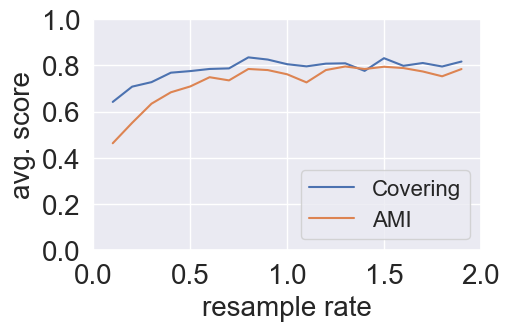

In [5]:
fontsize = 20
_, ax = plt.subplots(1, figsize=(5, 3))

ax.plot(resample_rates, df_covering_resampled.mean(), label="Covering")
ax.plot(resample_rates, df_ami_resampled.mean(), label="AMI")

ax.set_xlabel("resample rate", fontsize=fontsize)
ax.set_ylabel("avg. score", fontsize=fontsize)

ax.set_xticks(np.arange(0., 2.0 + 0.01, 0.5))
ax.set_yticks(np.arange(0., 1.0 + 0.01, 0.2))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.legend(loc=4, prop={'size': fontsize - 4})
plt.savefig(f"../../figures/resample_rate.pdf", bbox_inches="tight")

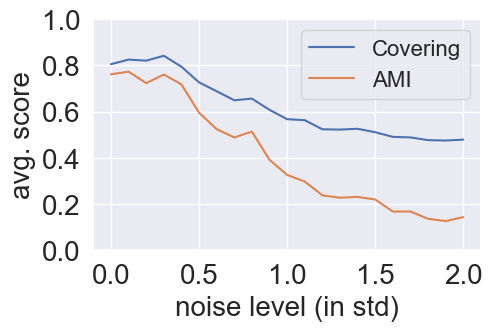

In [6]:
fontsize = 20
_, ax = plt.subplots(1, figsize=(5, 3))

ax.plot(noise_levels, df_covering_noise.mean(), label="Covering")
ax.plot(noise_levels, df_ami_noise.mean(), label="AMI")

ax.set_xlabel("noise level (in std)", fontsize=fontsize)
ax.set_ylabel("avg. score", fontsize=fontsize)

ax.set_yticks(np.arange(0.0, 1.0 + 0.01, 0.2))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.legend(loc=1, prop={'size': fontsize - 4})
plt.savefig(f"../../figures/noise_level.pdf", bbox_inches="tight")